In [1]:
import sanitizer as sn
import data_reader as dr
import plot_func as pt

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot

| Simulation | Knee surgery | Cardiac surgery | Hip and Knee replacement | Lungs surgery |
|- |- |- |- |- |
| 01 | riskMetrics18620210943| riskMetrics23620211139 | riskMetrics23620210124 | riskMetrics17620210421 |
| 02 |  |  |  | riskMetrics17620210442 |
| 03 | riskMetrics18620210953 | riskMetrics23620211153 | riskMetrics23620210131 | riskMetrics17620210459 |
| 04 |  |  |  | riskMetrics17620210508 |
| 05 | riskMetrics18620210959 | riskMetrics23620210118 | riskMetrics23620210140 | riskMetrics17620210524 |
| 06 |  |  |  | riskMetrics17620210529 |
| 07 | riskMetrics18620211004 | riskMetrics23620210152 | riskMetrics23620210156 | riskMetrics17620210730 |
| 08 | riskMetrics18620211007 | riskMetrics23620210205 | riskMetrics23620210212 | riskMetrics17620210959 |
| 09 | riskMetrics18620211011 | riskMetrics23620210208 | riskMetrics23620210217 | riskMetrics17620211011 |
| 10 | riskMetrics12720210940 | riskMetrics12720211049 | riskMetrics12720210728 | riskMetrics12720210714 |
| 11 | riskMetrics12720211147 | riskMetrics12720211108 | riskMetrics12720211155 | riskMetrics12720211140 |

In [3]:
mongodb_URI = "mongodb://localhost:27017"
database_name = "riskMetrics12720211155"

In [4]:
mongo_data = dr.read_data(mongodb_URI, database_name)

In [5]:
measurements = [sn.sanitize(metric, date=True, string=True) for metric in mongo_data]   
mongo_data = pd.DataFrame(measurements)
mongo_data.date = pd.to_datetime(mongo_data.date)

### Plot Configuration 1

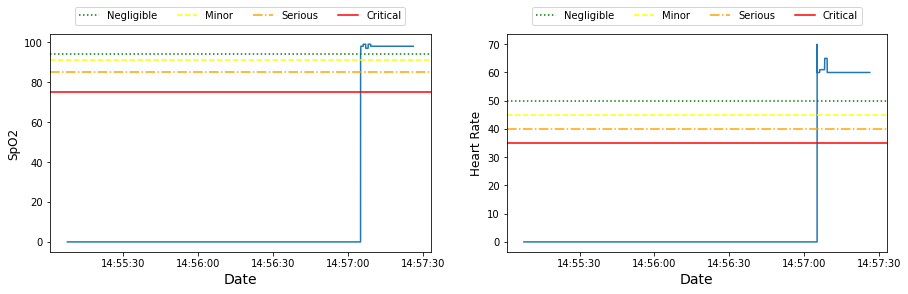

In [6]:
pt.plot_cfg1(mongo_data)

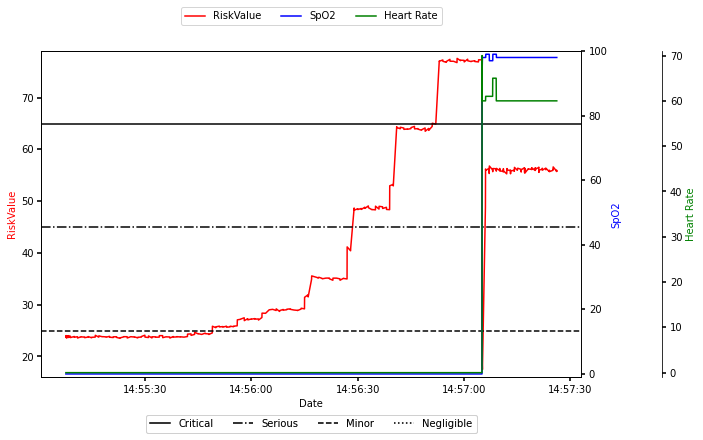

In [7]:
pt.plot_details_cfg1(mongo_data)

### Plot Configuration 2

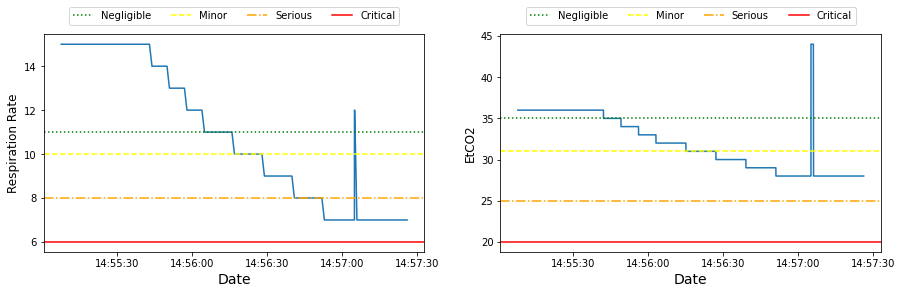

In [8]:
pt.plot_cfg2(mongo_data)

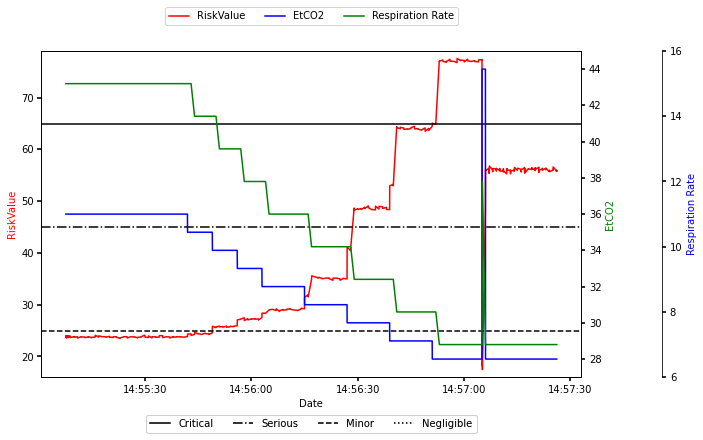

In [9]:
pt.plot_details_cfg2(mongo_data)

### Plot Risk Value

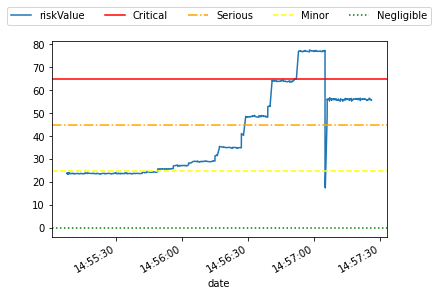

In [10]:
mongo_data.plot(x ='date', y='riskValue', kind = 'line')
plt.axhline(65, color="red", linestyle="-", label="Critical")
plt.axhline(45, color="orange", linestyle="-.", label="Serious")
plt.axhline(25, color="yellow", linestyle="--", label="Minor")
plt.axhline(0, color="green", linestyle=":", label="Negligible")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5)